## Changing Seasonality with Prophet

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/airline_passengers.csv

--2021-05-18 17:09:17--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/airline_passengers.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.98
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2049 (2.0K) [application/vnd.ms-excel]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   2.00K  --.-KB/s    in 0s      

2021-05-18 17:09:17 (73.2 MB/s) - ‘airline_passengers.csv’ saved [2049/2049]



In [3]:
df = pd.read_csv('airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


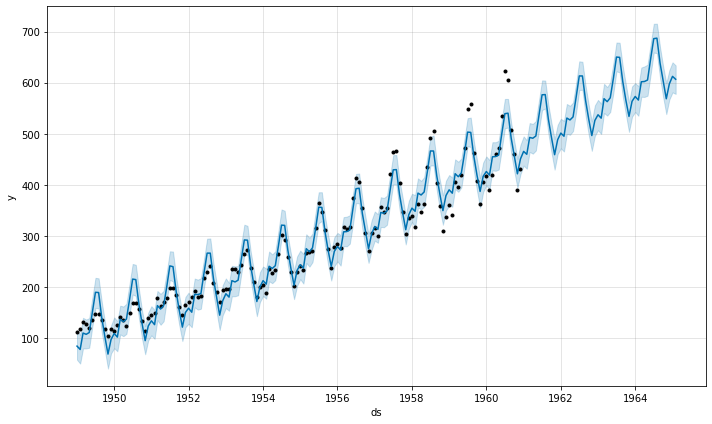

In [5]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

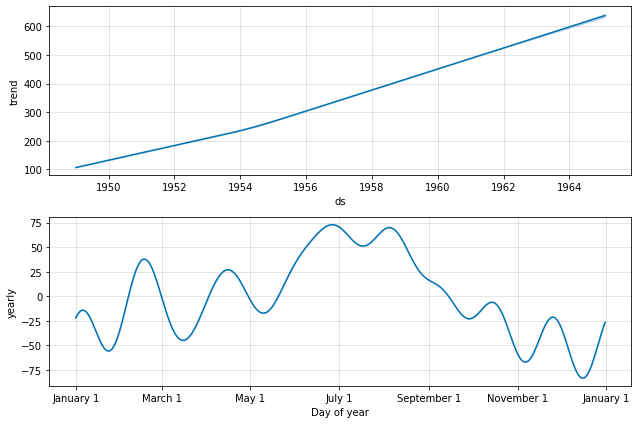

In [6]:
fig = m.plot_components(forecast)

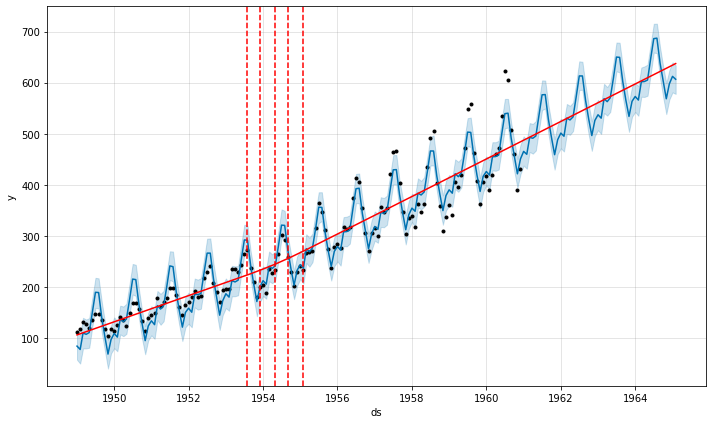

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Change to Multiplicative 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


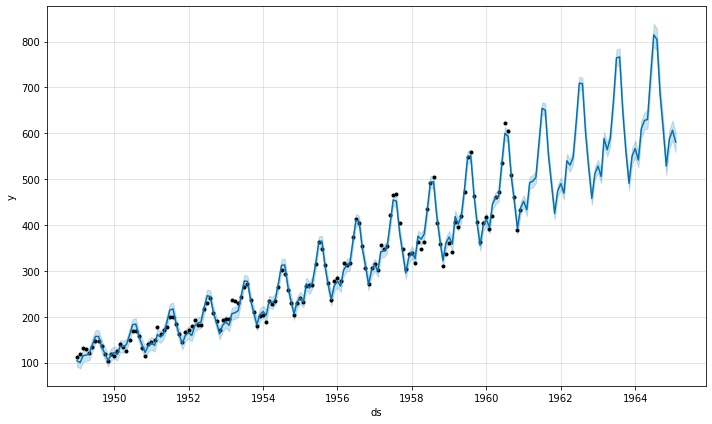

In [9]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

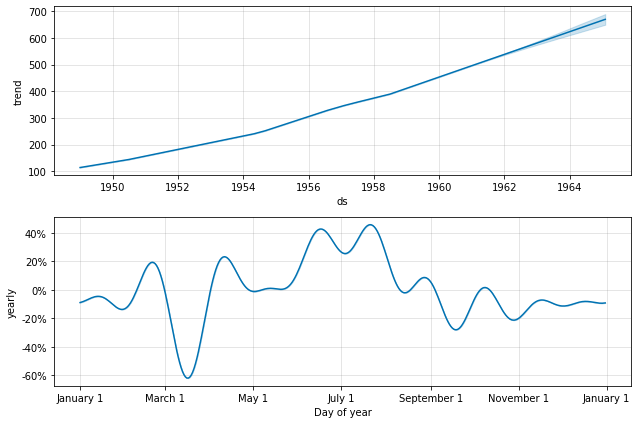

In [10]:
fig = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)